<a href="https://colab.research.google.com/github/amirkasaei/K-Nearest-Neighbors-with-scikit-learn/blob/main/K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Required Libraries**

#### **load the required libraries**

In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from math import sqrt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

#### **set GPU**

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Loading Data**

In [36]:
abalone_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [37]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [38]:
abalone = pd.read_csv(url, names=abalone_columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [39]:
abalone.shape

(4177, 9)

#### **encode dataset**

In [40]:
le = LabelEncoder()

abalone[['Sex']] = abalone[['Sex']].apply(le.fit_transform, axis=0)

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### **Data Correlation**

In [41]:
correlation_matrix = abalone.corr()
correlation_matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# **helper function**

In [34]:
def plot_confusionmatrix(y_train_pred,y_train):
  cf = confusion_matrix(y_train_pred,y_train)
  sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

# **Classification**

## **Sex**

### **Feature Selection**

In [10]:
labels = [0, 1, 2]

In [11]:
classes = le.classes_
classes

array(['F', 'I', 'M'], dtype=object)

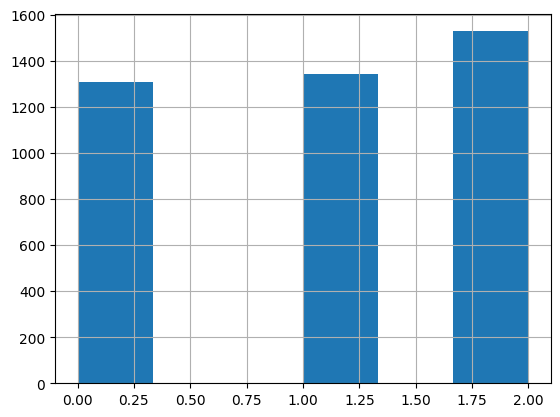

In [12]:
abalone['Sex'].hist(bins=6)
plt.show()

In [13]:
pd.DataFrame(correlation_matrix["Sex"])

,Sex
Sex,1.000000
Length,-0.036066
Diameter,-0.038874
Height,-0.042077
Whole weight,-0.021391
Shucked weight,-0.001373
Viscera weight,-0.032067
Shell weight,-0.034854
Rings,-0.034627


**divide given columns into two types of variables (target variable and feature variables).**

In [14]:
x = abalone[abalone_columns[1:]]
y = abalone['Sex']
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [16]:
x = np.array(x)
y = np.array(y)

### **Splitting Data**
80% train and 20% test

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [22]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

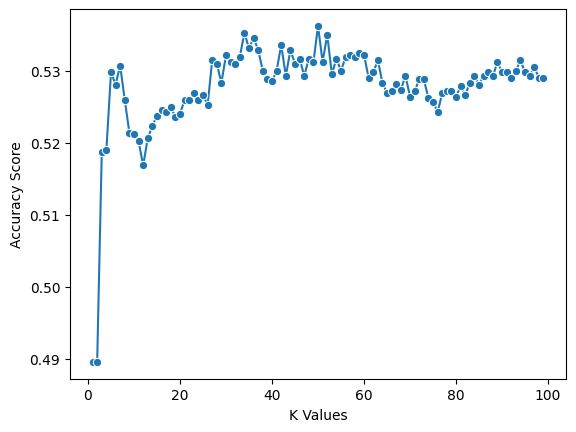

In [23]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [24]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 50


### **K Fold**

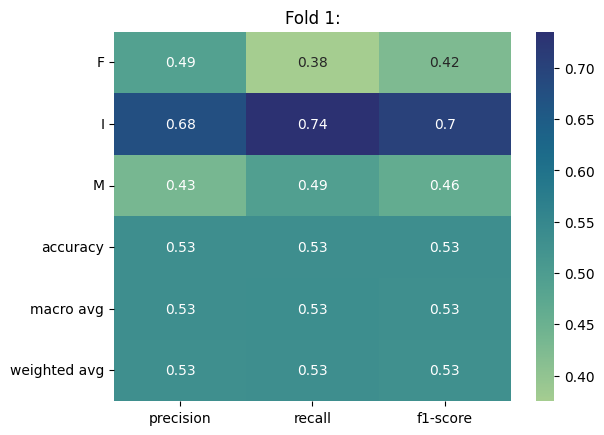

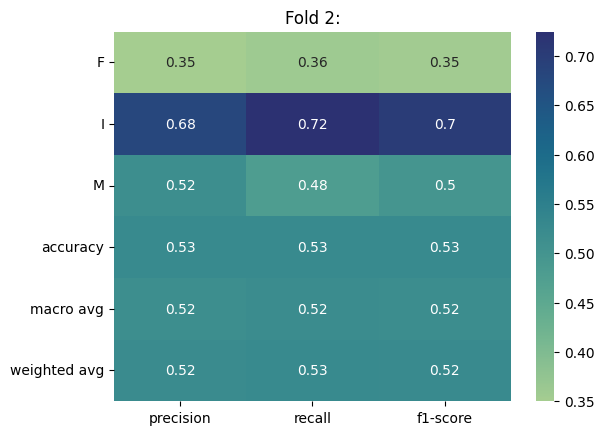

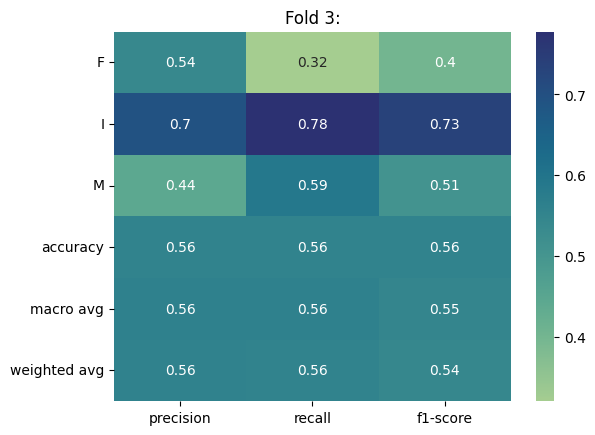

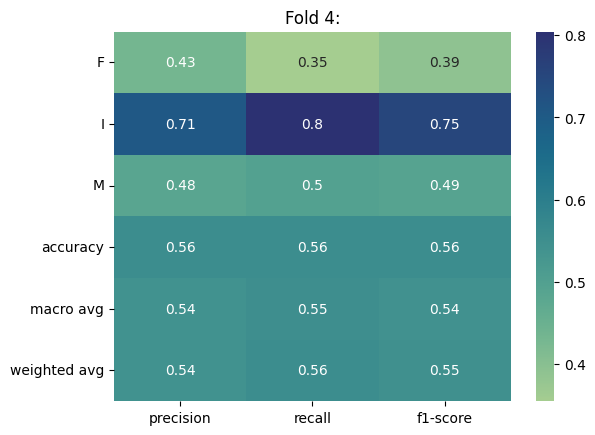

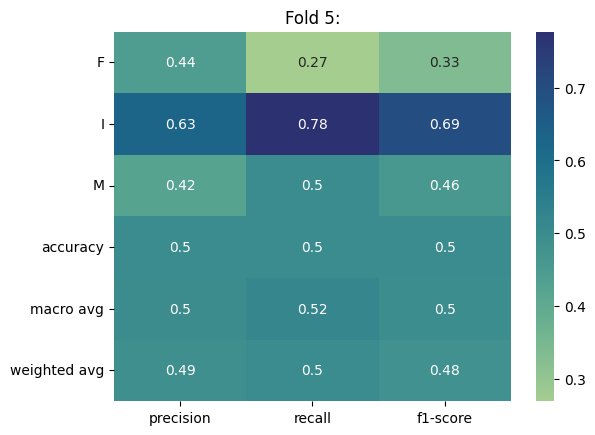

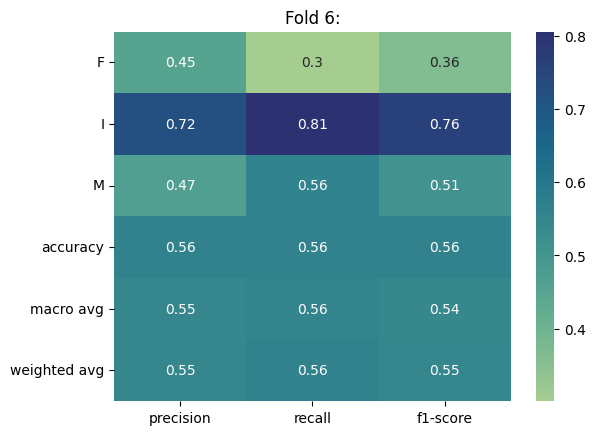

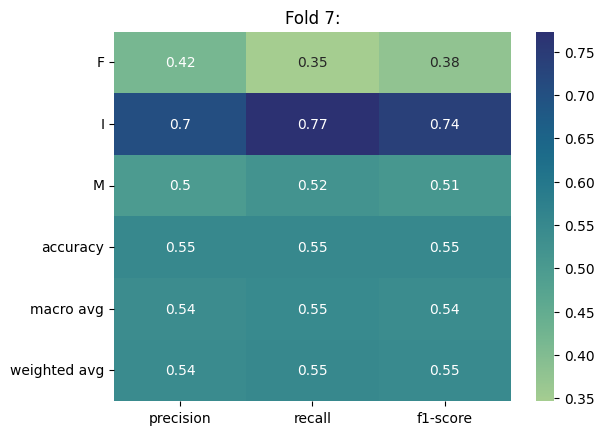

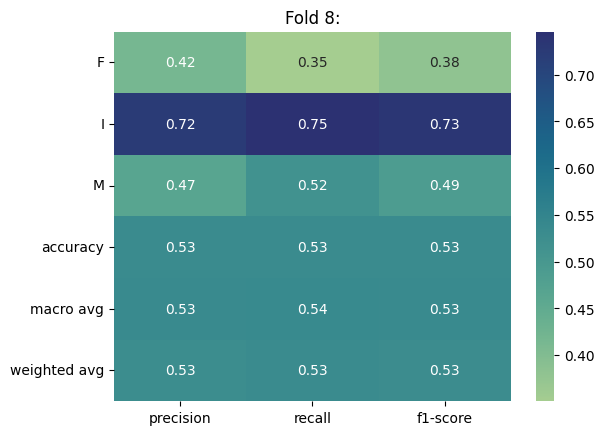

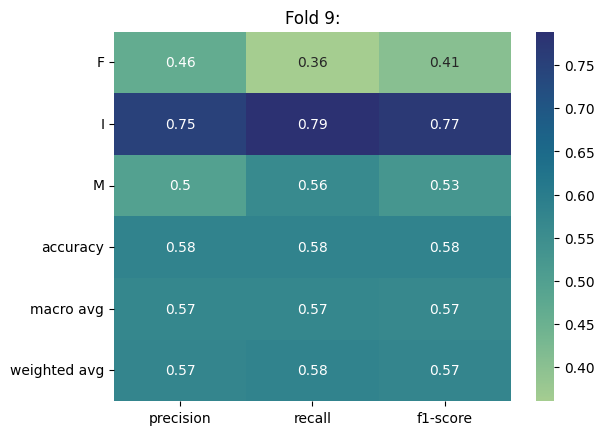

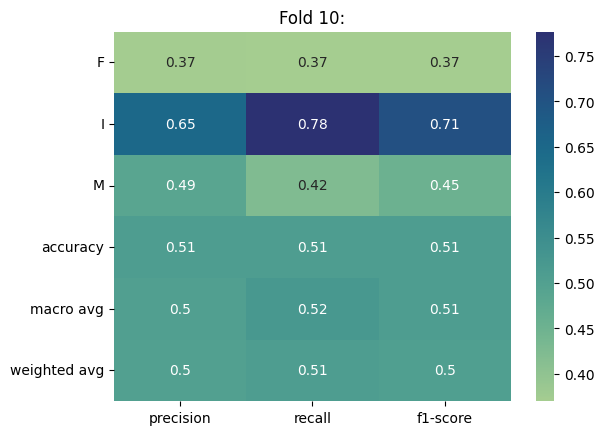

In [26]:
folds_report = []
kf = KFold(n_splits=10, shuffle=True)
folds = kf.split(x, y)

for i, (train_index, test_index) in enumerate(folds, start=1):

  x_train_fold, x_test_fold, y_train_fold, y_test_fold = x[train_index], x[test_index], y[train_index], y[test_index]

  knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
  knn.fit(x_train_fold, y_train_fold)

  y_pred_fold = knn.predict(x_test_fold)

  report = classification_report(y_test_fold, y_pred_fold, labels=labels, target_names=classes, output_dict=True)
  folds_report.append(report)

  plt.figure()
  plt.title(f"Fold {i}:")
  sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="crest")


In [27]:
accuracy, precision, recall, f1_score = [], [], [], []
for report in folds_report:
  accuracy.append(report['accuracy'])
  precision.append(report['weighted avg']['precision'])
  recall.append(report['weighted avg']['recall'])
  f1_score.append(report['weighted avg']['f1-score'])

avg_accuracy = np.mean(accuracy)
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
print('average accuracy =', avg_accuracy, '\naverage precision =', avg_precision, '\naverage recall =', avg_recall, '\naverage f1-score =', avg_f1_score)

average accuracy = 0.5408190194256078 
average precision = 0.5339415539088418 
average recall = 0.5408190194256078 
average f1-score = 0.5326986798941267


### **Model Evaluation**

#### **Model**

In [30]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

In [31]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#### **Classification Report**

<Axes: >

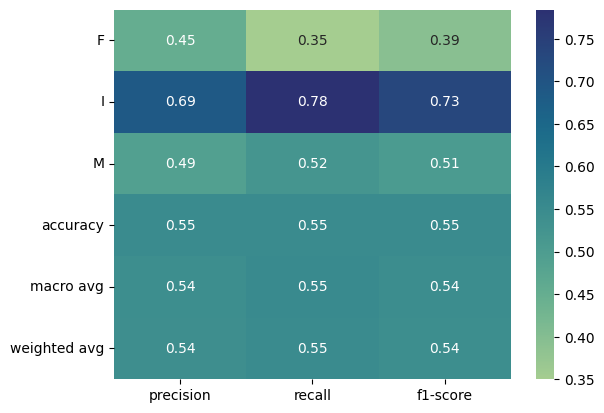

In [32]:
report = classification_report(y_test, y_pred, labels=labels, target_names=classes, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="crest")

#### **Confusion Matrix**

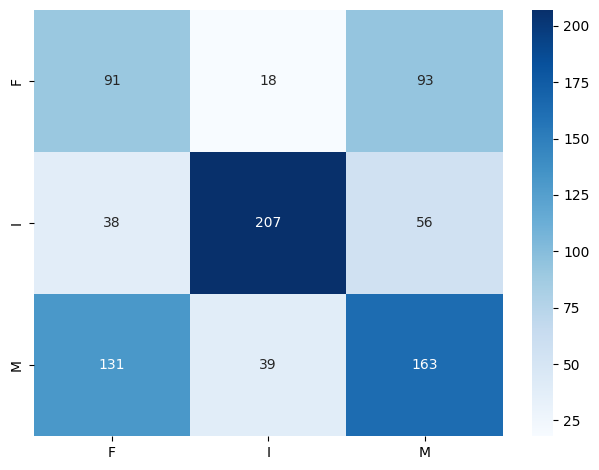

In [35]:
plot_confusionmatrix(y_pred, y_test)

## **Rings**

### **Feature Selection**

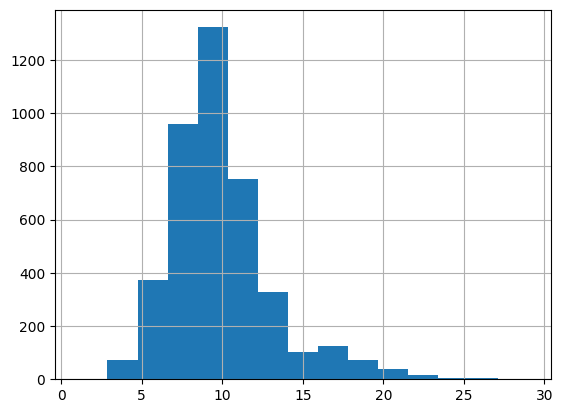

In [42]:
abalone["Rings"].hist(bins=15)
plt.show()

In [43]:
np.unique(abalone["Rings"])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [44]:
pd.DataFrame(correlation_matrix["Rings"])

,Rings
Sex,-0.034627
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Rings,1.000000


**divide given columns into two types of variables (target variable and feature variables).**

In [45]:
x = abalone[abalone_columns[:-1]]
y = abalone['Rings']
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [56]:
classes = np.unique(y)
classes

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29])

In [47]:
x = np.array(x)
y = np.array(y)

### **Splitting Data**
80% train and 20% test

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

### **Best K**

In [ ]:
k_values = [i for i in range (1,100)]
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    score = cross_val_score(knn, x, y, cv=10)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

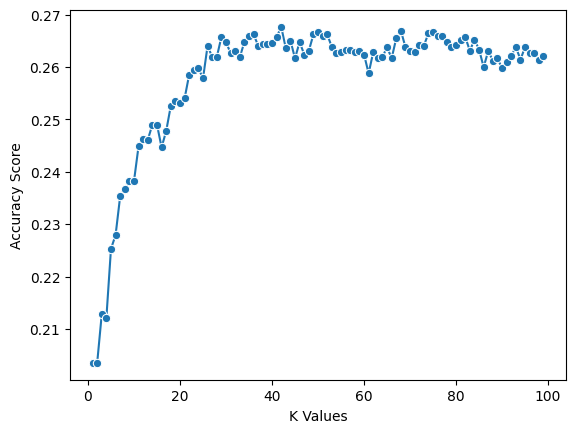

In [52]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [53]:
best_index = np.argmax(scores)
best_k = k_values[best_index]
print('best K:', best_k)

best K: 42


### **K Fold**

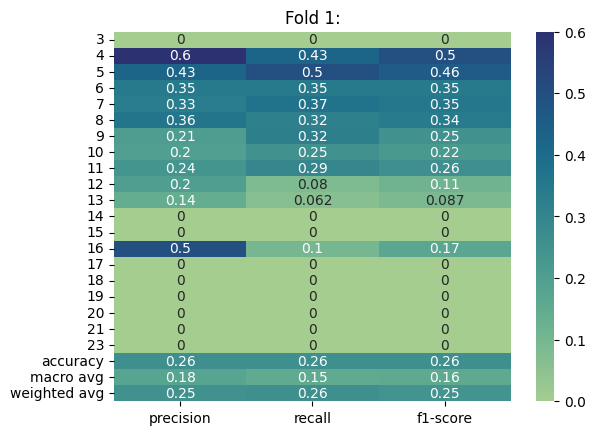

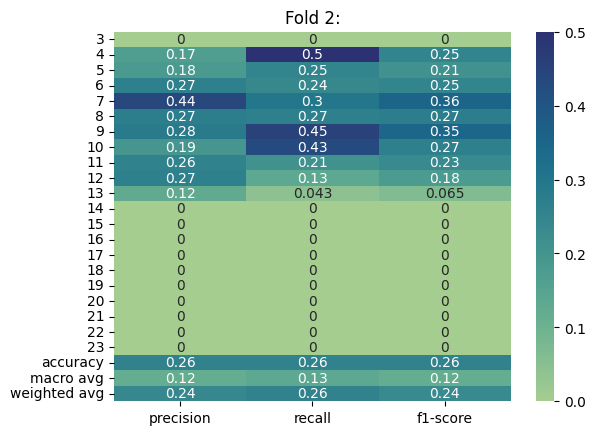

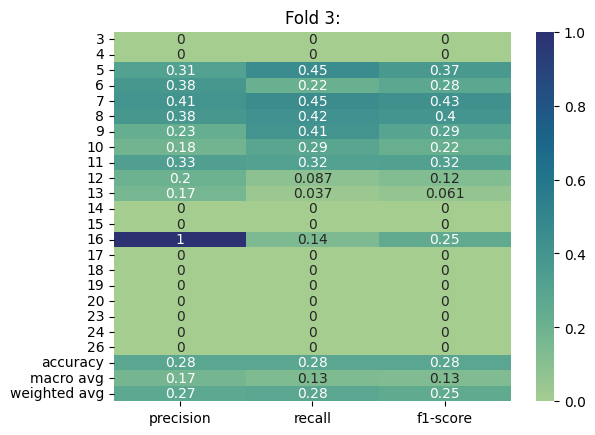

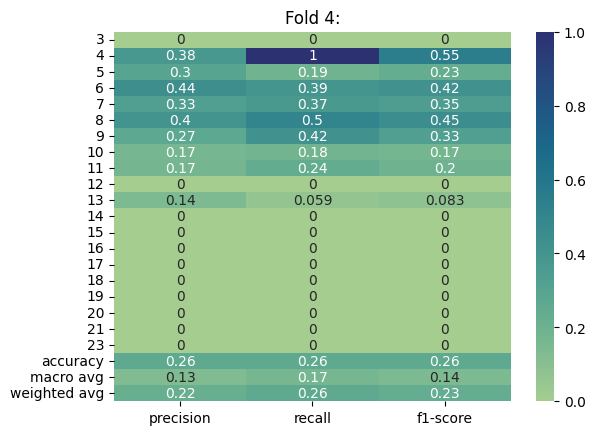

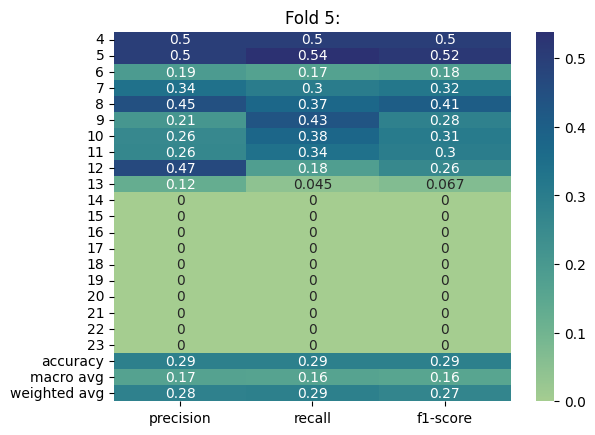

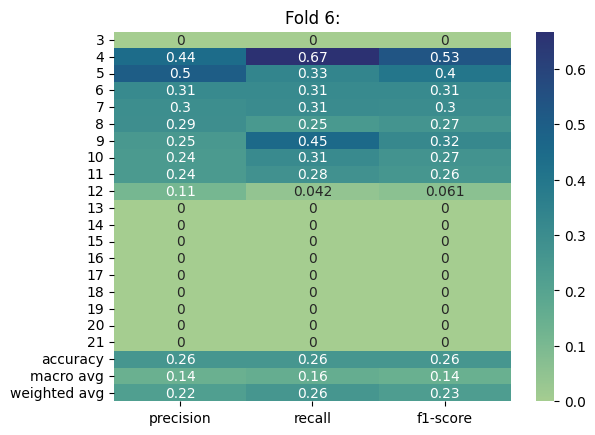

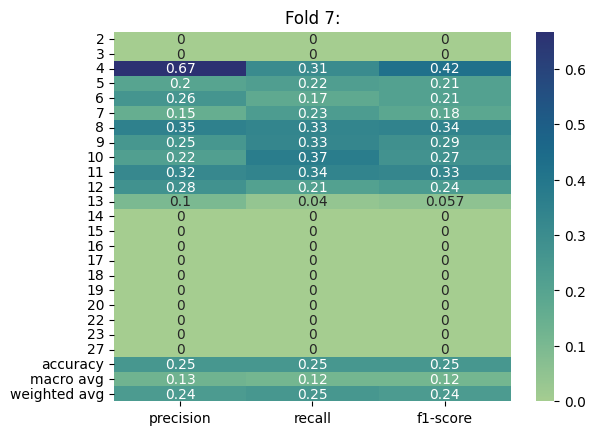

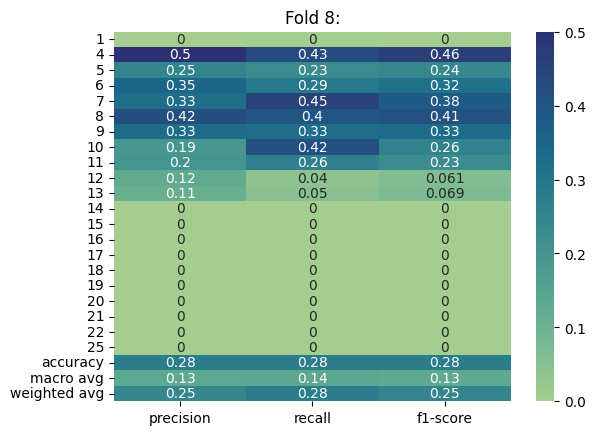

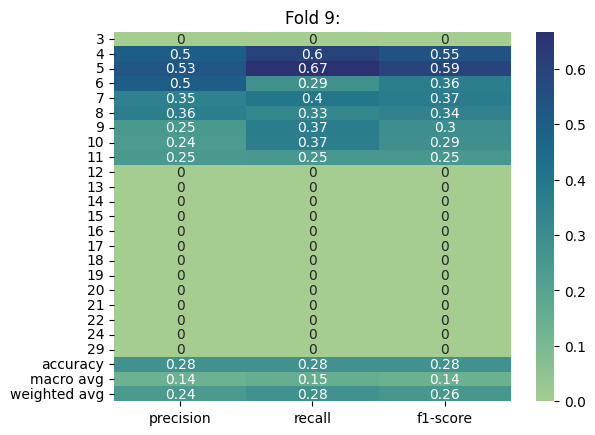

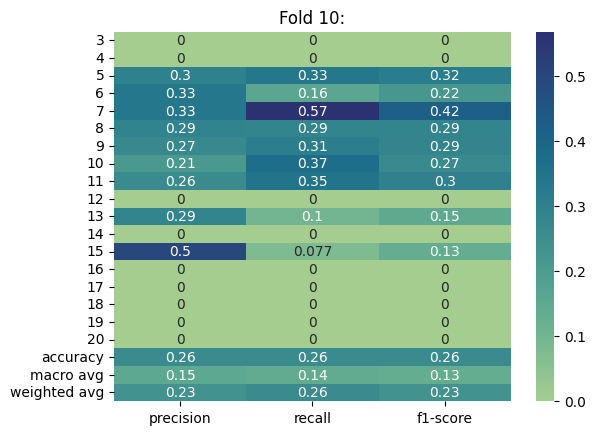

In [57]:
folds_report = []
kf = KFold(n_splits=10, shuffle=True)
folds = kf.split(x, y)

for i, (train_index, test_index) in enumerate(folds, start=1):

  x_train_fold, x_test_fold, y_train_fold, y_test_fold = x[train_index], x[test_index], y[train_index], y[test_index]

  knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')
  knn.fit(x_train_fold, y_train_fold)

  y_pred_fold = knn.predict(x_test_fold)

  report = classification_report(y_test_fold, y_pred_fold, output_dict=True, zero_division=0)
  folds_report.append(report)

  plt.figure()
  plt.title(f"Fold {i}:")
  sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="crest")


In [58]:
accuracy, precision, recall, f1_score = [], [], [], []
for report in folds_report:
  accuracy.append(report['accuracy'])
  precision.append(report['weighted avg']['precision'])
  recall.append(report['weighted avg']['recall'])
  f1_score.append(report['weighted avg']['f1-score'])

avg_accuracy = np.mean(accuracy)
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
print('average accuracy =', avg_accuracy, '\naverage precision =', avg_precision, '\naverage recall =', avg_recall, '\naverage f1-score =', avg_f1_score)

average accuracy = 0.267898982249607 
average precision = 0.24389369002083244 
average recall = 0.267898982249607 
average f1-score = 0.24509420838057272


### **Model Evaluation**

#### **Model**

In [59]:
knn = KNeighborsClassifier(n_neighbors=best_k, weights='distance')

In [60]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

#### **Classification Report**

<Axes: >

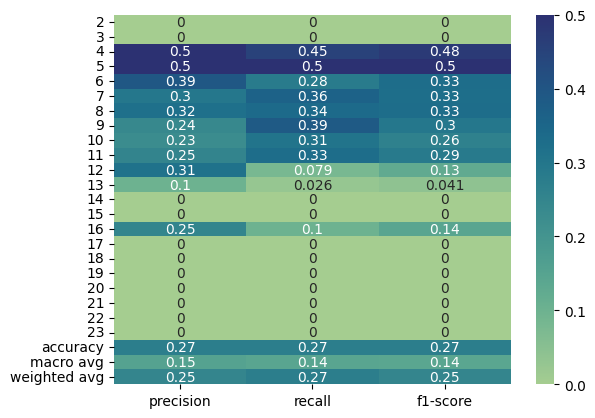

In [61]:
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap="crest")

#### **Confusion Matrix**

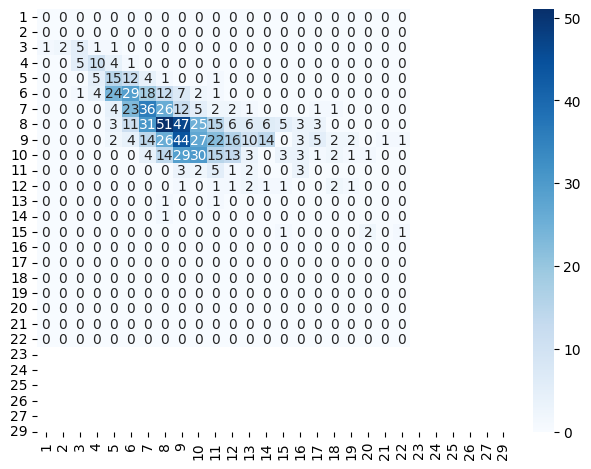

In [62]:
plot_confusionmatrix(y_pred, y_test)